In [1]:
# ! uv pip install /home/palash/Code/msyrs --upgrade

### Import Python packages


In [2]:
import macrosynergy
import pandas as pd
import numpy as np
import polars as pl
import os

from macrosynergy.panel import view_timelines
from macrosynergy.management.types import QuantamentalDataFrame


### Import Python bindings - `msyrs`


In [3]:
import msyrs

In [4]:
DATA_FOLDER_PATH = "E:/Work/jpmaqs-data"
DATA_FOLDER_PATH = os.path.abspath(os.path.expanduser("~/Code/go-dataquery/jpmaqs-data"))
# DATA_FOLDER_PATH = "C:/Users/PalashTyagi/Code/go-dataquery/jpmaqs-data"
DQ_CLIENT_ID = os.getenv("DQ_CLIENT_ID")
DQ_CLIENT_SECRET = os.getenv("DQ_CLIENT_SECRET")

In [5]:
import time

nb_start_time = time.time()

In [6]:
dfpath = f"{DATA_FOLDER_PATH}/data/ADPEMPL_SA_P1M1ML1/USD_ADPEMPL_SA_P1M1ML1.csv"

starttime = time.time()
ldf: pl.DataFrame = msyrs.qdf.load_qdf(dfpath)
print(f"Time taken to load qdf: {time.time() - starttime}")
ldf.head(5)

Time taken to load qdf: 0.005953311920166016


shape: (5, 7)
┌────────────┬─────┬────────────────────┬───────────┬─────────┬─────────┬─────────┐
│ real_date  ┆ cid ┆ xcat               ┆ value     ┆ grading ┆ eop_lag ┆ mop_lag │
│ ---        ┆ --- ┆ ---                ┆ ---       ┆ ---     ┆ ---     ┆ ---     │
│ date       ┆ str ┆ str                ┆ f64       ┆ f64     ┆ i64     ┆ i64     │
╞════════════╪═════╪════════════════════╪═══════════╪═════════╪═════════╪═════════╡
│ 2010-03-03 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 3       ┆ 33      │
│ 2010-03-04 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 4       ┆ 34      │
│ 2010-03-05 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 5       ┆ 35      │
│ 2010-03-08 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 8       ┆ 38      │
│ 2010-03-09 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 9       ┆ 39      │
└────────────┴─────┴────────────────────┴───────────┴─────────┴─────────┴─────────┘

In [7]:
cids_dm = "AUD.CAD.CHF.EUR.GBP.JPY.NOK.NZD.SEK.USD".split(".")
cids_em = "CLP.COP.CZK.HUF.IDR.ILS.INR.KRW.MXN.PLN.THB.TRY.TWD.ZAR".split(".")
cids = cids_dm + cids_em
cids_dux = list(set(cids) - set(["IDR", "NZD"]))
ecos = (
    "CPIC_SA_P1M1ML12.CPIC_SJA_P3M3ML3AR.CPIC_SJA_P6M6ML6AR.CPIH_SA_P1M1ML12."
    "CPIH_SJA_P3M3ML3AR.CPIH_SJA_P6M6ML6AR.INFTEFF_NSA.INTRGDP_NSA_P1M1ML12_3MMA."
    "INTRGDPv5Y_NSA_P1M1ML12_3MMA.PCREDITGDP_SJA_D1M1ML12.RGDP_SA_P1Q1QL4_20QMA."
    "RYLDIRS02Y_NSA.RYLDIRS05Y_NSA.PCREDITBN_SJA_P1M1ML12".split(".")
)

mkts = (
    "DU02YXR_NSA.DU05YXR_NSA.DU02YXR_VT10.DU05YXR_VT10.EQXR_NSA.EQXR_VT10."
    "FXXR_NSA.FXXR_VT10.FXCRR_NSA.FXTARGETED_NSA.FXUNTRADABLE_NSA".split(".")
)
xcats = ecos + mkts

tickers = [f"{c}_{x}" for c in cids for x in xcats]

In [8]:
starttime = time.time()

big_df: pl.DataFrame = msyrs.qdf.load_qdf_from_download_bank(
    folder_path=DATA_FOLDER_PATH,
    xcats=xcats,
)
print(f"Time taken to load qdf batch: {time.time() - starttime}")


Time taken to load qdf batch: 1.260918378829956


In [9]:
big_df.estimated_size("mb")

286.95422172546387

In [10]:
starttime = time.time()

test_df = msyrs.qdf.reduce_dataframe(df=big_df, xcats=mkts)

print(f"Time taken to reduce qdf: {time.time() - starttime}")
print(test_df.estimated_size("mb"))
test_df = None

Reduced DataFrame from 5484608 to 2091732 rows
Time taken to reduce qdf: 2.296652317047119
99.42372608184814


In [11]:
sel_cids = ["USD", "EUR", "GBP", "AUD", "CAD", "CHF", "JPY", "INR"]
start = "2010-01-01"
end = "2011-01-01"

In [12]:
eq_xcats = [xc for xc in xcats if xc.startswith("EQ")]
starttime = time.time()

eq_df = msyrs.qdf.reduce_dataframe(
    df=big_df, cids=sel_cids, xcats=eq_xcats, start=start, end=end
)

print(f"Time taken to reduce qdf: {time.time() - starttime}")

Reduced DataFrame from 5484608 to 4000 rows
Time taken to reduce qdf: 0.805347204208374


In [13]:
fx_xcats = [xc for xc in xcats if xc.startswith("FX")]

starttime = time.time()

fx_df = msyrs.qdf.reduce_dataframe(
    df=big_df, cids=sel_cids, xcats=fx_xcats, start=start, end=end
)
new_df: pl.DataFrame = msyrs.qdf.update_dataframe(df=eq_df, df_add=fx_df)

print(f"Time taken to reduce qdf: {time.time() - starttime}")

Reduced DataFrame from 5484608 to 8750 rows
Time taken to reduce qdf: 1.038344144821167
xcat_replace not implemented yet (passed value: false)


In [14]:
starttime = time.time()

new_df: pl.DataFrame = msyrs.qdf.update_dataframe(df=eq_df, df_add=fx_df)

print(f"Time taken to update qdf: {time.time() - starttime}")

Time taken to update qdf: 0.006207466125488281xcat_replace not implemented yet (passed value: false)



In [15]:
wdf = QuantamentalDataFrame(new_df.to_pandas().fillna(0)).to_wide()

for i in range(4):
    col = wdf.columns[np.random.randint(0, len(wdf.columns))]
    dates = sorted(np.random.choice(wdf.index, 2, replace=False))
    dtr = pd.bdate_range(dates[0], dates[1]) 
    wdf.loc[dtr[0]:dtr[-1], col] = np.nan

wdf = QuantamentalDataFrame.from_wide(wdf, categorical=False)
# cast column 'real_date' to pl.Date
new_df = pl.DataFrame(wdf).with_columns(pl.col("real_date").cast(pl.Date, strict=True))

In [16]:
msyrs.utils.create_blacklist_from_qdf(new_df)

{'CAD_BLACKLIST_0': ('2010-01-15', '2010-01-15'),
 'CAD_BLACKLIST_1': ('2010-01-19', '2010-02-12'),
 'CAD_BLACKLIST_2': ('2010-02-16', '2010-04-01'),
 'CAD_BLACKLIST_3': ('2010-04-05', '2010-05-28'),
 'CAD_BLACKLIST_4': ('2010-06-01', '2010-07-02'),
 'CAD_BLACKLIST_5': ('2010-07-06', '2010-09-03'),
 'CAD_BLACKLIST_6': ('2010-09-07', '2010-09-20'),
 'CHF_BLACKLIST_0': ('2010-03-16', '2010-04-01'),
 'CHF_BLACKLIST_1': ('2010-04-05', '2010-05-28'),
 'CHF_BLACKLIST_2': ('2010-06-01', '2010-07-02'),
 'CHF_BLACKLIST_3': ('2010-07-06', '2010-09-03'),
 'CHF_BLACKLIST_4': ('2010-09-07', '2010-10-08'),
 'CHF_BLACKLIST_5': ('2010-10-12', '2010-11-10'),
 'CHF_BLACKLIST_6': ('2010-11-12', '2010-11-24'),
 'CHF_BLACKLIST_7': ('2010-11-26', '2010-12-06'),
 'GBP_BLACKLIST_0': ('2010-08-03', '2010-09-03'),
 'GBP_BLACKLIST_1': ('2010-09-07', '2010-10-08'),
 'GBP_BLACKLIST_2': ('2010-10-12', '2010-11-10'),
 'GBP_BLACKLIST_3': ('2010-11-12', '2010-11-24'),
 'GBP_BLACKLIST_4': ('2010-11-26', '2010-12-03'),


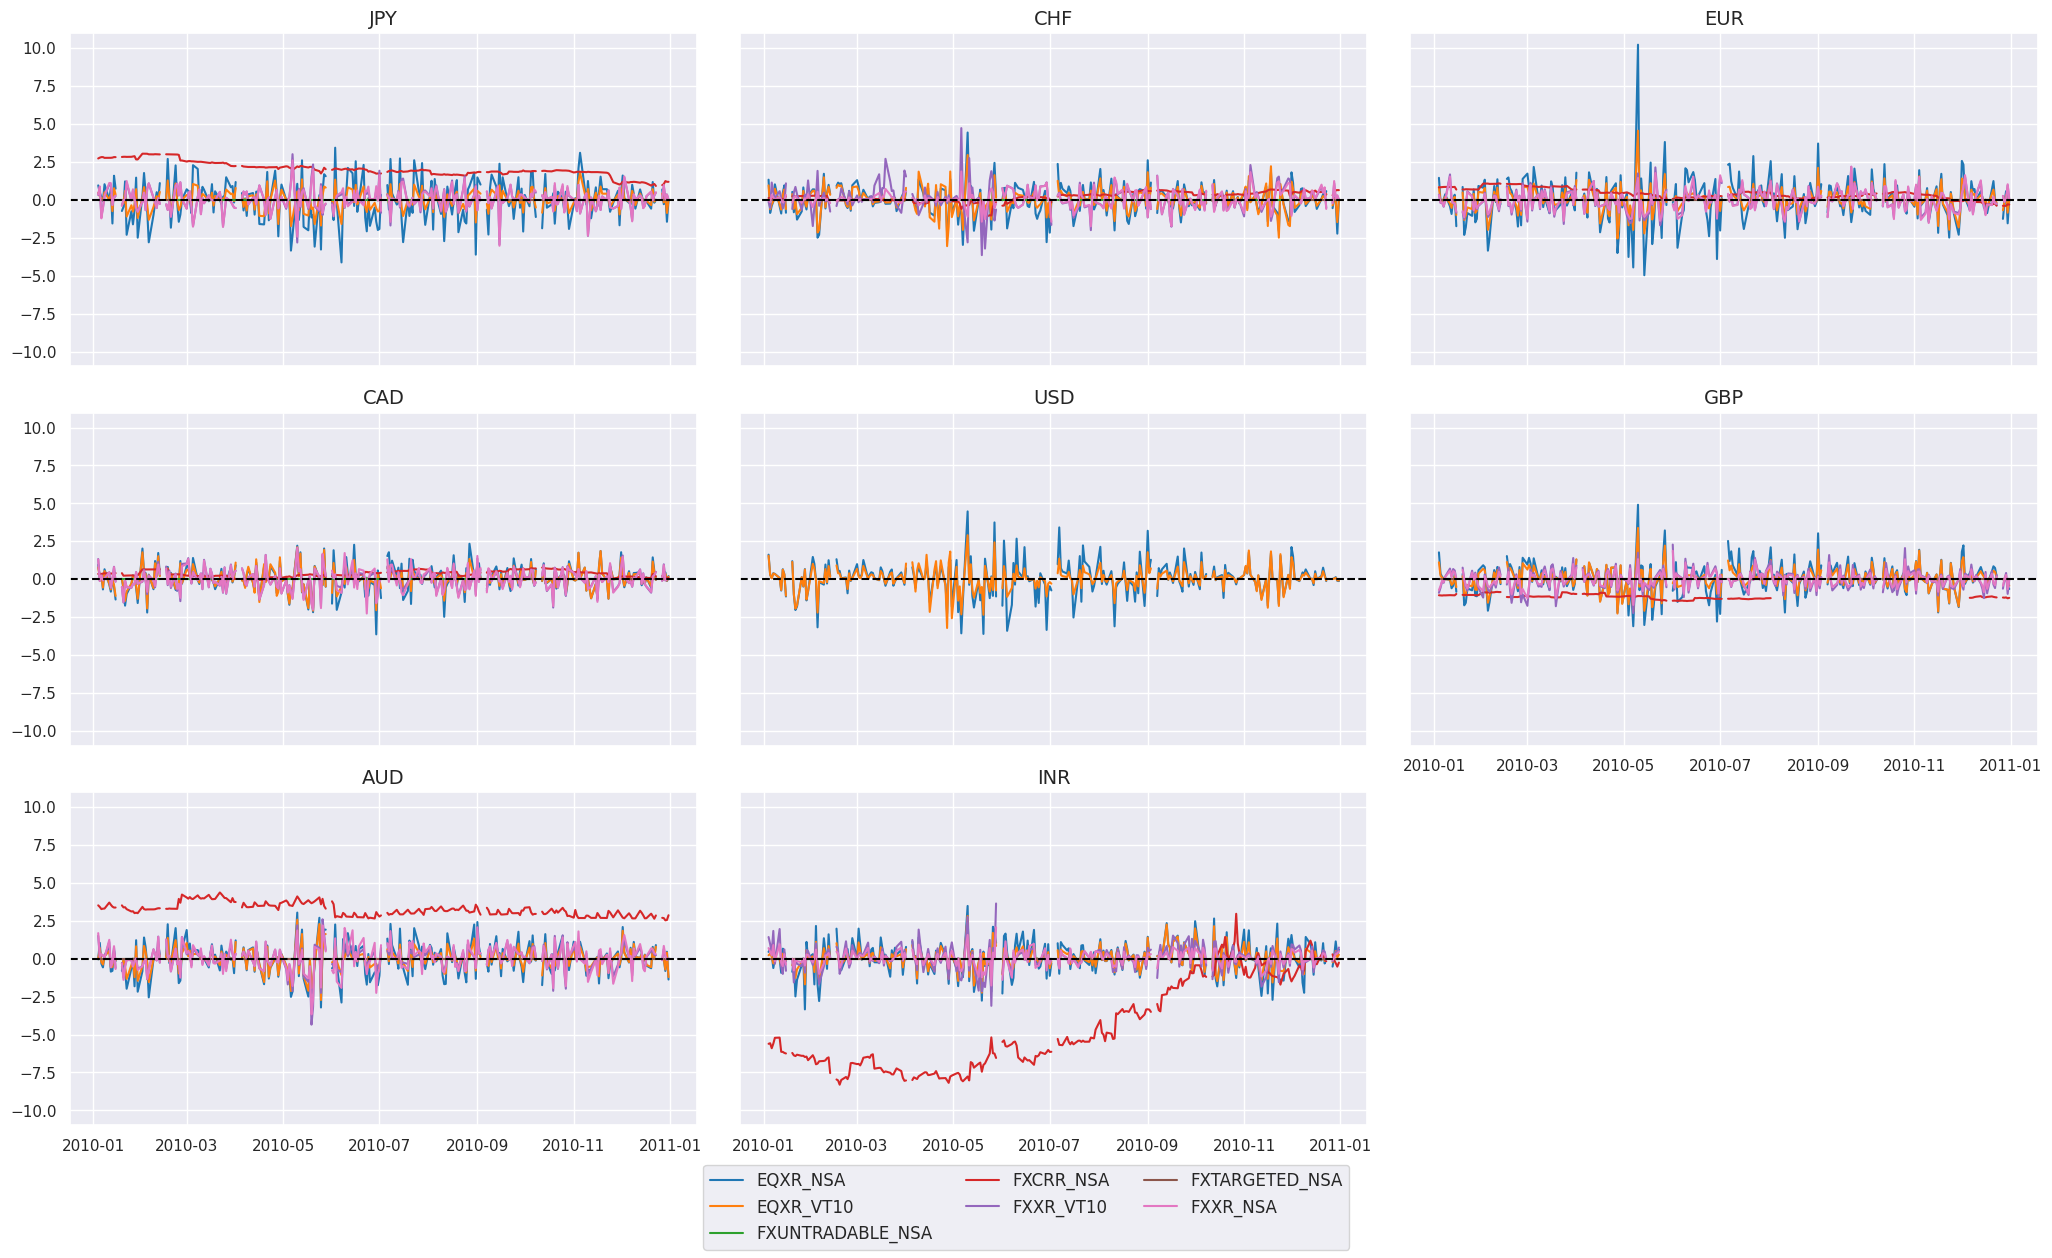

In [17]:
view_timelines(df=new_df.to_pandas())

In [18]:
msyrs.utils.get_bdates_series_default_pl(start_date='2000-01-01', end_date='2020-05-01', freq='D').dtype

Date

In [19]:
msyrs.utils.get_bdates_series_default_opt(start_date='1971-01-01', end_date='2040-05-01', freq='D')

shape: (18_088,)
Series: 'bdates' [date]
[
	1971-01-01
	1971-01-04
	1971-01-05
	1971-01-06
	1971-01-07
	…
	2040-04-25
	2040-04-26
	2040-04-27
	2040-04-30
	2040-05-01
]

In [20]:
end_time = time.time()
print(f"Time taken: {end_time - nb_start_time} seconds")

Time taken: 7.492820739746094 seconds
